## Лабораторная работа 3: Word Embeddings

Эта лабораторная работа посвящена Word Embeddings и различными развесёлыми манипуляциями с ними. Мы будем преобразовывать слова в плотные вектора с помощью двух алгоритмов Word2Vec: cbow и skipgram. Воспользуемся готовым решением, а именно библиотекой gensim. Полную документацию библиотеки можно почитать здесь: https://radimrehurek.com/gensim/apiref.html.

Но для начала подготовим данные. В gensim есть несколько встроенных датасетов, один из них -- text8. Этот датасет содержит выдержки из англоязычной википедии примерно на 32мб. Это немного, но чтобы поиграться сойдёт.

Давайте загрузим этот датасет. Он представляет из себя список списков слов.

In [1]:
import gensim.downloader as api

dataset = api.load("text8") 
data = [d for d in dataset]
data[50][:10]

['many',
 'exist',
 'these',
 'choices',
 'give',
 'us',
 'alternative',
 'forms',
 'of',
 'geometry']

Теперь давайте обучим модель w2v, использующую алгоритм cbow. Для этого воспользуемся классом Word2Vec из библиотеки gensim.

In [3]:
from gensim.models import Word2Vec
bow_model = Word2Vec(data,               # датасет
                     window=10,          # ширина контекстного окна
                     size=32,            # размерность векторов-эмбеддингов
                     sg=0,               # флаг, определяющий пользуемый алгоритм; 0 -- cbow, 1 -- skipgram
                     min_count=2).wv     # минимальное количество вхождений слова в датасет, необходимое для попадания в словарь

После того, как модель обучилась, мы можем всячески манипулировать полученными векторами. Например векторное представление слоа можно получить так:

In [4]:
bow_model['punk']

array([ 3.4196641 ,  1.0545969 ,  0.12483593, -2.8551161 ,  2.6842515 ,
       -0.831711  , -2.6578002 ,  1.8598666 ,  0.76129246,  0.9489734 ,
       -0.9867942 , -2.0338569 , -0.06348941,  2.0106294 , -2.5679069 ,
       -2.4816103 , -1.7915792 ,  0.1440791 ,  0.3405879 , -0.3204755 ,
       -0.9377816 ,  0.58536506,  3.0286868 , -3.4196649 ,  4.652702  ,
       -1.7709312 , -0.821394  ,  0.91066   , -0.18321471, -0.5020204 ,
       -3.946677  , -4.7827067 ], dtype=float32)

...а еще можно получить список наиболее похожих слов...

In [5]:
bow_model.most_similar('anxiety')

[('symptoms', 0.908572256565094),
 ('neurological', 0.8952803611755371),
 ('impairment', 0.8950521945953369),
 ('dysfunction', 0.8926898241043091),
 ('pain', 0.8903711438179016),
 ('disorder', 0.8850260972976685),
 ('chronic', 0.8836899399757385),
 ('epilepsy', 0.8780925869941711),
 ('chemotherapy', 0.877821683883667),
 ('trauma', 0.8744090795516968)]

...а еще эти вектора можно складывать и вычитать друг из друга (см. лекцию). Метод $\textit{most_similar}$ принимает два списка слов: positive (которые он складывает) и negative (которые вычитает). Это позволяет получить некоторую аналогию переноса знаний. Самый известный пример: при сложении векторов 'king' и 'woman' и вычитании вектора 'man' должно получиться нечто, близкое к вектору 'queen'. По смыслу это можно интерпретировать так: "как король, только женщина, а не мужчина". 

Давайте узнаем, кого наша модель считает русским Мао Дзе Дуном.

In [6]:
bow_model.most_similar(positive=['mao', 'russia'], negative=['china'])

[('stalin', 0.8428492546081543),
 ('mussolini', 0.8004790544509888),
 ('fascists', 0.7987930774688721),
 ('lenin', 0.7919632792472839),
 ('bolsheviks', 0.7885718941688538),
 ('gorbachev', 0.7851902842521667),
 ('nikita', 0.7777279019355774),
 ('khrushchev', 0.7759047150611877),
 ('regime', 0.774254322052002),
 ('mikhail', 0.7729086875915527)]

$\textbf{Задание.}$ По аналогии постройте и обучите Word2Vec модель, использующую алгоритм skipgram. Изучив особенности алгоритма определите как именно нужно изменить параметры модели по сравнению с алгоритмом cbow (что увеличить, что уменьшить). Размерность векторов-эмбеддингов должна быть равна 32.

In [7]:
sg_model = Word2Vec(data,               # датасет
                     window=3,          # ширина контекстного окна
                     size=32,            # размерность векторов-эмбеддингов
                     sg=1,               # флаг, определяющий пользуемый алгоритм; 0 -- cbow, 1 -- skipgram
                     min_count=2).wv     # минимальное количество вхождений слова в датасет, необходимое для попадания в словарь

$\textbf{Задание.}$ Придумайте свой пример на сложение и вычитание векторов.

$\textit{NB.}$ Как уже было отмечено, text8 является сравнительно небольшим датасетом, а размерность 32 является весьма скромной для векторов-эмбеддингов (стандартным значением является 300). Оба этих факта отрицательно влияют на качество эмбеддингов. Поэтому если результат вычисления не соответствует вашим ожиданием, то это может быть связано не только с плохой настройкой вашей модели, но и с низкой встречаемостью выбранных вами слов. Попробуйте разные примеры на сложение и поэкспереминтируйте с настройками параметров модели.


In [8]:
sg_model.most_similar(positive=['dog', 'cat'])

[('bee', 0.8801017999649048),
 ('ass', 0.8782802820205688),
 ('cow', 0.8747957944869995),
 ('rat', 0.8713359832763672),
 ('pig', 0.8712301254272461),
 ('goat', 0.86586594581604),
 ('hamster', 0.8598469495773315),
 ('girl', 0.8528170585632324),
 ('dogs', 0.8500494956970215),
 ('ox', 0.8449122309684753)]

In [9]:
sg_model.most_similar(positive=['soldier'], negative=['war'])

[('priest', 0.5315684080123901),
 ('dancer', 0.5146262645721436),
 ('wears', 0.47455894947052),
 ('skater', 0.4523375332355499),
 ('haired', 0.45088475942611694),
 ('musician', 0.4461635649204254),
 ('curly', 0.44545871019363403),
 ('conductor', 0.4437969923019409),
 ('priestess', 0.44153329730033875),
 ('gentleman', 0.43814027309417725)]

In [10]:
sg_model.most_similar(positive=['russia', 'putin'])

[('sukarno', 0.9531794786453247),
 ('sadat', 0.9268358945846558),
 ('mobutu', 0.9265849590301514),
 ('habr', 0.9231008291244507),
 ('mengistu', 0.9226111769676208),
 ('sandinistas', 0.9223814010620117),
 ('vichy', 0.9166853427886963),
 ('bolshevist', 0.9164046049118042),
 ('rsfsr', 0.9162588119506836),
 ('makarios', 0.9161602258682251)]

Давайте визуализируем построенные вашей моделью эмбеддинги. Будем передавать значения компонент как цвета.

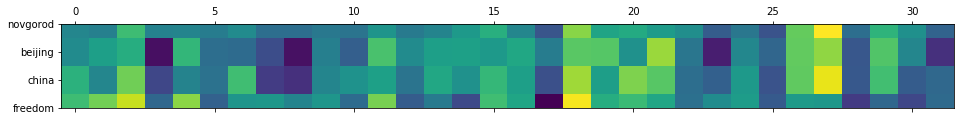

In [12]:
import matplotlib.pyplot as plt
import numpy as np

words_to_show=['novgorod', 'beijing', 'china', 'freedom']

nrows = len(words_to_show)
ncols = 32

image = np.zeros([nrows, ncols]) 
for i in range(nrows):
    word = words_to_show[i]
    image[i]=sg_model[word]
    
plt.matshow(image) 
plt.yticks(range(nrows), words_to_show) 
plt.show() 

$\textbf{Задание.}$ Порефлексируйте над полученной выше картинкой. Подумайте над тем, какие пары векторов должны быть больше визуально похожи друг на друга, а какие меньше, и соответствует ли результат действительности. 

$\textbf{Задание.}$ Реализуйте функцию скалярного произведения векторов и с помощью неё оцените, какая пара векторов похожа друг на друга сильнее -- novgorod и beijing или china и freedom?

In [13]:
def mul (arr1, arr2):
    return np.dot(arr1, arr2)

novgorod = sg_model['novgorod']
beijing = sg_model['beijing']
china = sg_model['china']
freedom = sg_model['freedom']

print(mul(novgorod, beijing))

print(mul(china, freedom))

4.9048667
5.4659095


#### Проекция на плоскость: PCA

32-мерные вектора -- это, конечно, здорово, но картинка выше не слишком уж информативна. Было бы очень интересно посмотреть на эти вектора в пространстве и оценить как они группируются в кластеры. Но мы, люди, привыкли смотреть на 2-х и 3-х мерные вектора (ну или точки), в то время как наши эмбеддинги состоят из 32-х размерностей... Хорошая новость! Существуют алгоритмы понижения размерности.

Самым простым из них является алгоритм PCA (Principal Component Analysis -- Метод Главных Компонент).

В геометрическом смысле, PCA пытается найти такие оси, вдоль которых происходит наибольшая часть разброса значений. The "natural" axes, if you wish.

<img src="https://github.com/yandexdataschool/Practical_RL/raw/master/yet_another_week/_resource/pca_fish.png" style="width:30%">

В алгебраическом смысле, PCA пытается разложить матрицу $X$, содержащую вектора, на две матрицы меньшего размера: $W$ и $\hat W$ так, чтобы минимизировать среднее квадратичное отклонение:

$$\|(X W) \hat{W} - X\|^2_2 \to_{W, \hat{W}} \min$$
- $X \in \mathbb{R}^{n \times m}$ - матрица объектов;
- $W \in \mathbb{R}^{m \times d}$ - матрица прямого преобразования;
- $\hat{W} \in \mathbb{R}^{d \times m}$ - матрица обратного преобразования;
- $n$ -- число объектов, $m$ -- исходная размерность $d$ -- итоговая размерность;



Давайте выберем 12 слов, с помощью вашей модели получим эмбеддинги и попытаемся визуализировать их на плоскости. Пусть 4 слова соответствуют условной теме 'мировые лидеры', ещё 4 -- теме 'растительность', а оставшиеся 4 -- теме 'программирование'.

In [14]:
words = ['putin', 'trump', 'berlusconi', 'merkel', 'flower', 'tree', 'leaf', 'pine', 'programming', 'code', 'python', 'java']
word_vectors = np.array([sg_model[word] for word in words])

$\textbf{Задание.}$ Примените алгоритм PCA из библиотеки sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA) к эмбеддинам, чтобы получить из них двумерные вектора. Полезным также будет применить нормализацию к полученным векторам.

In [15]:
from sklearn.decomposition import PCA

word_vectors_pca = PCA(n_components=2)
word_vectors_pca = word_vectors_pca.fit_transform(word_vectors)

Что же, если вы всё сделали правильно, то теперь полученные вектора можно визуализировать!

In [40]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

Loading BokehJS ...

$\textbf{Задание.}$ Порефлексируйте над картинкой, которую строит код ниже. Оцените насколько хорошо точки группируются в кластеры, соответствующие выбранным 'условным темам'.

In [46]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)

# Наведите курсором на точку -- появится слово!

Figure(id='1006', ...)